In [12]:
for c in cols_empty:
    print(c, (~df_full[c].isnull()).sum())import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Table of Contents
* [1 Import Relevant Packages](#1-Import-Relevant-Packages)
* [2 Load Data](#2-Load-Data)
* [3 Basic Description of Data](#3-Basic-Description-of-Data)
* [4 Choosing Columns to Keep](#4-Choosing-Columns-to-Keep)
    * [4.1 Columns Selection Process](#4.1-Column-Selection-Process)
    * [4.2 Dataframe Description After Keeping Relevant Columns](#4.2-Dataframe-Description-After-Keeping-Relevant-Columns)
* [5 Dealing with Missing Value Redundancy](#5-Dealing-with-Missing-Value-Redundancy)
* [6 Renaming Columns](#6-Renaming-Columns)
* [7 Dealing with Missing Values](#7-Dealing-with-Missing-Values)
    * [7.1 Proportion of Rows with Missing Values](#7.1-Proportion-of-Rows-with-Missing-Values)
    * [7.2 Visualizing Relationship Between Missing Value Entries](#Visualizing-Relationship-Between-Missing-Value-Entries)
        * [7.2.1 Bar Plot](#7.2.1-Bar-Plot)
        * [7.2.2 Nullity Matrix](#7.2.2-Nullity-Matrix)
        * [7.2.3 Heatmap](#7.2.3-Heatmap)
        * [7.2.4 Dendrogram](#7.2.4-Dendrogram)
        * [7.2.5 Count Plot for Features `Smoker_Cat` and `Heavy_Drinker`](#7.2.5-Count-Plot-for-Features-`Smoker_Cat`-and-`Heavy_Drinker`)
        * [7.2.6 Pearson's Chi-Squared Test for the Features `Smoker_Cat` and `Heavy_Drinker`](#7.2.6-Pearson's-Chi-Squared-Test-for-the-Features-`Smoker_Cat`-and-`Heavy_Drinker`)
    * [7.3 Removing Missing Values](#7.3-Removing-Missing-Values)
* [8 Description of Final Dataframe](#8-Description-of-Final-Dataframe)
* [Exporting Final Dataframe](#Exporting-Final-Dataframe)

In [13]:
path_in = '../Data/2015_clean.csv'
df = pd.read_csv(path_in)
df.head()

,Health,Hypertension,High_Cholesterol,Age_Group,Overweight,Smoker_Cat,Heavy_Drinker,Physical_Cat,Diabetes,Sex,Race,Sample_Weights,Heart_Disease
0,2.0,2.0,2.0,9.0,4.0,3.0,1.0,4.0,2.0,2.0,1.0,341.384853,2.0
1,1.0,1.0,1.0,7.0,3.0,1.0,1.0,2.0,2.0,2.0,1.0,108.060903,2.0
2,2.0,2.0,2.0,9.0,3.0,4.0,1.0,4.0,2.0,2.0,1.0,341.384853,2.0
3,2.0,1.0,1.0,9.0,2.0,4.0,1.0,4.0,2.0,2.0,1.0,258.682223,2.0
4,1.0,2.0,1.0,11.0,3.0,4.0,1.0,1.0,2.0,2.0,1.0,256.518591,2.0


<AxesSubplot:xlabel='Heart_Disease', ylabel='count'>

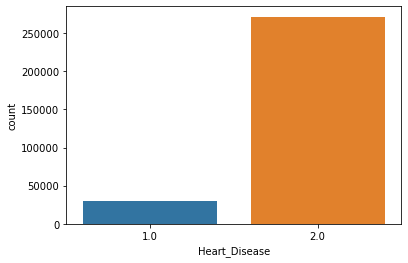

In [38]:
sns.countplot(data=df, x='Heart_Disease')

## 4 Choosing Columns to Keep
Only the few columns that are perceived to be useful will be kept for the rest of the analysis. According to the Centers for Disease Control and Prevention (CDC) website, it is known that Coronary Artery Disease (CAD) has the following risk factors:
* Having hypertension
* Having high cholesterol
* Being overweight
* Using tobacco products
* Drinking alcohol excessively
* Being physically inactive
* Having diabetes

Therefore, we only keep the relatively few columns that are related to these risk factors. Most of the columns that will be kept will use calculated variables. The kept columns are:
* `_RFHLTH`: Adults with good or better health. "1" for "Good or better health", "2" for "Fair or poor health".
* `_RFHYPE5`: Adults who have been told have high blood pressure. "1" for "No", "2" for "Yes".
* `_RFCHOL`: Adults who have been told have high cholesterol. "1" for "No", "2" for "Yes".
* `_AGEG5YR`: Age group of the respondent. Ages are binned into five different categories. For example, "1" corresponds to "Age 18 to 24".
* `_BMI5CAT`: Weight category of respondent. There are five different categories. For example, "1" is "Underweight", "2" is "Normal weight", etc.
* `_PACAT1`: Physical activity category. For example, "1" is "Highly active", "2" is "Active", etc.
* `DIABETE3`: Adults that have been told have diabetes. There are six possible responses, but later these columns will be transformed into one that has "1" for "No" and "2" for "Yes".
* `SEX`: "1" for "Male", "2" for "Female".
* `_RACEGR3`: Race of respondents using five different categories.
* `_LLCPWT`: The final survey weight assigned to each respondent.
* `_MICHD`: The target feature. "1" if the respondent reported ever having coronary heart disease (CHD) or myocardial infarction (MI), a.k.a a heart attack.

### 4.1 Column Selection Process

In [ ]:
#List of columns to keep.
cols_kept = ['_RFHLTH', '_RFHYPE5', '_RFCHOL', '_AGEG5YR', '_BMI5CAT', '_SMOKER3', '_RFDRHV5', \
          '_PACAT1', 'DIABETE3', 'SEX', '_RACEGR3', '_LLCPWT', '_MICHD']

#This part of the code makes sure that no typos were made when naming the columns by checking if each
#of the names on the previous list does indeed appear in the list of dataframe columns.
cols_wrong = [x for x in cols_kept if x not in df_full.columns]
if len(cols_wrong) == 0:
    print('No problems.')
else:
    print('These column names are not in the dataframe:')
    for x in wrong_cols:
        print(x)

#This is yet another check to make sure no typos were made when choosing the columns.
bool_list = [x in df_full.columns for x in cols_wrong]
assert all(bool_list)

### 4.2 Dataframe Description After Keeping Relevant Columns

In [ ]:
df = df_full[cols_kept]
df.head()

In [ ]:
df.shape

In [ ]:
df.info()

In [ ]:
#The following function prints out the value counts for all columns in a dataframe.
def value_counts_cols(d_frame):
    '''Function accepting a pandas dataframe as input and prints out the value counts of all of its columns'''
    for c in d_frame.columns:
        print(d_frame[c].value_counts(dropna=False).sort_index(), '\n')

In [ ]:
def value_counts_data_frame(d_frame):
    tuples = []
    counts = []
    '''Function accepting a pandas dataframe as input that returns a multi-indexed dataframe containing
    the value counts of the unique values of each column. The levels of the returned dataframe's index
    are the column names of the input dataframe and the unique values of said column.'''
    for c in d_frame.columns:
        s = d_frame[c].value_counts(dropna=False).sort_index()
        for i in s.index:
            tuples.append((c, round(i, 1)))
            counts.append(s[i])
    multi_index = pd.MultiIndex.from_tuples(tuples, names=['Columns', 'Value'])
    return pd.DataFrame(counts, index=multi_index, columns=['Counts'])

In [ ]:
#Value counts for all columns.
value_counts_cols(df)

## 5 Dealing with Missing Value Redundancy
In most of the columns that have been kept, a value of "9" corresponds to "No answer" (the "age" columns use instead a value of "14"). However, many of the entries have also been left blank. It, therefore, makes sense to change all number codes referring to "No answer" to NaN's in order to make dealing with null values easier.

In [ ]:
#Three of the columns do not use a value of "9" for "No answer". They will therefore not form part of the loop 
#that replaces the value of "9" for "np.nan".
cols_no_age = [x for x in df.columns if x not in ['_AGEG5YR', 'DIABETE3', '_LLCPWT']]
for c in cols_no_age:
    df[c] = df[c].replace({9.0:np.nan})

#For the age columns, it is the value of "14" that corresponds to "No answer".
df['_AGEG5YR'] = df['_AGEG5YR'].replace({14.0:np.nan})

#For the diabetes columns, the "Yes" and "No", answers are further divided into categories. For example, "1"
#corresponds to "Yes, and not pregnant" and "2" corresponds to "Yes, but pregnant". We therefore relabel all "Yes"
#answers as "1", all "No" answers as "2", and "7" and "9" as "np.nan" since they refer to "No answer".
df['DIABETE3'] = df['DIABETE3'].replace({2.0:1.0, 3.0:2.0, 4.0:2.0, 7.0:np.nan, 9.0:np.nan})

In [ ]:
#Check value counts again after relabeling.
value_counts_cols(df)

## 6 Renaming Columns
The column names are a bit obscure, so we will change them with more informative names.

In [ ]:
col_names ={'_RFHLTH':'Health', '_RFHYPE5':'Hypertension', '_RFCHOL':'High_Cholesterol', \
            '_AGEG5YR':'Age_Group', '_BMI5CAT':'Overweight', '_SMOKER3':'Smoker_Cat', \
            '_RFDRHV5':'Heavy_Drinker', '_PACAT1':'Physical_Cat', 'DIABETE3':'Diabetes', \
            'SEX':'Sex', '_RACEGR3':'Race', '_LLCPWT':'Sample_Weights', '_MICHD':'Heart_Disease'}
df = df.rename(columns=col_names)
df

## 7 Dealing with Missing Values

### 7.1 Proportion of Rows with Missing Values

In [ ]:
#Total number of columns and number of columns with no missing values.
cols_tot = df.shape[0]
cols_no_miss = df.dropna().shape[0]

print('Total columns:', cols_tot, '\nTotal columns with no missing values:', cols_no_miss)
print('Fraction of columns with missing values:', round((cols_tot - cols_no_miss) / cols_tot, 2))

If columns with missing values are dropped, we would lose about a third of the data. However, the dataset is vast; we would still keep a total of close to 300,000 entries. Before we decide on whether this is a good idea, however, we should further explore the data to make sure there are no obvious patterns related to the missing responses.

### 7.2 Visualizing Relationship Between Missing Value Entries

#### 7.2.1 Bar Plot

In [ ]:
msno.bar(df)
plt.show()

#### 7.2.2 Nullity Matrix

In [ ]:
msno.matrix(df)
plt.show()

#### 7.2.3 Heatmap

In [ ]:
msno.heatmap(df)
plt.show()

#### 7.2.4 Dendrogram

In [ ]:
msno.dendrogram(df)
plt.show()

The missing values for the features `Heavy_Drinker` and `Smoker_Cat` seem to be highly correlated. Let's further explore the relationship between these two variables.

#### 7.2.5 Count Plot for Features `Smoker_Cat` and `Heavy_Drinker`

In [ ]:
sns.countplot(x='Smoker_Cat', hue='Heavy_Drinker', data=df)
plt.show()

#### 7.2.6 Pearson's Chi-Squared Test for the Features `Smoker_Cat` and `Heavy_Drinker`

In [ ]:
#Contingency table.
cont_tbl = pd.crosstab(df['Smoker_Cat'], df['Heavy_Drinker'])
cont_tbl

In [ ]:
sig_lvl = 0.95
chi2, p_val, dof, expected = ss.chi2_contingency(cont_tbl)
print(f'p-value: {p_val:.2f}', '\nWe', 'can' if p_val < 1 - sig_lvl else 'cannot', f'reject the null \
hypothesis of the two features not having a significant relation at the {sig_lvl * 100:.0f}% level.')

### 7.3 Removing Missing Values
When it comes to categorical data, the most common methods for dealing with missing values are to eliminate all rows with missing values or to impute the value that has the highest frequency. Since we are in a situation where the dataset is large even after removing the columns with missing values, we will adopt this method for now.

In [ ]:
df = df.dropna()
df.head()